## <center>Métodos de valuación de instrumentos derivados</center>


<small>**Autor:** Canales Ocampo Luis Gerardo</small>

<small>*+Metadata, doble click aquí*</small>
<!--
title: "Métodos de valuación de instrumentos derivados"
author: "Canales Ocampo Luis"
github: @LuisGCanales
mail: lgco.canales@gmail.com
description: "Este notebook contiene la implementación de algunos de los métodos que son base para la valuación de instrumentos derivados, en particular de opciones, así como un desarrollo de los antecedentes teóricos que los sustentan."
institute: "UNAM"
date: "10/01/2024"
keywords: 
  - derivados
  - opciones
  - finanzas
  - cuantitativos
-->

Este notebook contiene la implementación de algunos de los métodos que son base para la valuación de instrumentos derivados, en particular de opciones, así como un desarrollo de los antecedentes teóricos que los sustentan. Los métodos aquí tratados son:

- Valuación de *opciones europeas* mediante el modelo de **Black-Scholes**
- Valuación de *opciones europeas* mediante el método de **Monte Carlo**
- Valuación de *opciones digitales* mediante **árboles binomiales**
- Valuación de *opciones lookback* mediante la discretización de **Euler-Murayama** y el método de **Monte Carlo**

##### Librerías, módulos y funciones a utilizar

In [2]:
from scipy.stats import norm
import numpy as np

**plotters.py** es un módulo que contiene funciones auxiliares para graficar
las trayectorias simuladas  o calculadas que se usan en los métodos implementados
en este notebook.
Para poder usarlo, es necesario que el archivo **plotters.py** esté en la misma
carpeta que este archivo.

**plotters.py** requiere las siguientes librerías:

- matplotlib
- networkx
- numpy

Checar el archivo **requirements.txt** para ver las versiones específicas
de cada librería con las que se desarrolló el código.

En caso de tener errores relacionados con las funciones auxiliares para generar
las gráficas, en cada función de los métodos implementados hay argumentos para
desactivarlas.

In [ ]:
from plotters import graficar_trayectorias, plot_prices_tree

## Cálculo de la prima de una opción europea mediante el modelo de **Black-Scholes**

El modelo de **Black-Scholes** busca caracterizar la evolución temporal del precio de instrumentos derivados, bajo un conjunto de hipótesis acerca del mercado y de los instrumentos financieros involucrados.

<br>

Específicamente, para el caso aquí presentado se requerirá de las siguientes hipótesis:

<br>

- El mercado consiste de al menos un activo riesgoso, llamado **subyacente**, y uno libre de riesgo, normalmente llamado **bono**.

- El mercado es **libre de arbitraje**.

- El activo libre de riesgo tiene una tasa de retorno constante en el tiempo, **r**.

- El mercado tiene **liquidez ilimitada**. Es decir, se puede prestar y pedir prestado cualquier cantidad del activo libre de riesgo, bajo la tasa **r**.

- Se pueden realizar transacciones por cualquier cantidad del **subyacente**, incluyendo fraccionales.

- Se pueden realizar operaciones en corto sobre el **subyacente**.

- Los retornos logarítmicos instantáneos del **subyacente** se comportan como un **movimiento browniano geométrico** con **drift** y **volatibilidad** constantes en el tiempo.

- No hay costos derivados de las transacciones del mercado.

- El **subyacente** no paga dividiendos.

Partiendo de estas hipótesis, sabemos que el **subyacente S(t)** cumple la ecuación diferencial estocástica de un movimiento browniano geométrico:

<!-- (1) (2) (3) SDE Movimiento browniano geométrico-->

\begin{align}
dS(t) &= \mu S(t) dt + \sigma S(t) dW_t  \\
S(0) &= S_0 \\
W_t &\sim N(0, \sqrt{t})
\end{align}

con $\mu$ y $\sigma$ constantes.

Sea $V(t, S)$  el precio de la opción al tiempo **t**, respecto al subyacente **S**. $\:$ Si $V$ es de clase $C^1$ en **t** y de clase $C^2$ en S, por la Fórmula de Itô se cumple:

<!-- (4) Fórmula de Itô para V(t, S)-->

$$
dV = \left(\mu S\frac{\partial V}{\partial S} + \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial V^2}{\partial S^2} \right) dt
 + \sigma S \frac{\partial V}{\partial S} dW_t \tag{4}
$$


A continuación se considera un portafolio que consiste de una posición corta sobre la **opción** y una posición larga en magnitud $\frac{\partial V}{\partial S}$ sobre el **subyacente** , en un tiempo **t**. De esta manera, el valor del portafolio será:

<!-- (5) Portafolio con opción y subyacente-->

$$
\Pi = -V + \frac{\partial V}{\partial S}S \tag{5}
$$

Suponiendo que el portafolio es **auto-financiado**, es decir, toda transacción de los activos que lo conforman es financiada mendiante la transacción opuesta sobre el otro activo, se tendrá que el cambio infinitesimal de valor en el tiempo del portafolio depende únicamente del cambio infinitesimal de valor de las **opciones** y **subyacentes** que lo componen. De esta forma el cambio de valor del portafolio en el periodo $[t, \, \Delta t]$ está dado por:

<!-- (6) Cambio instantáneo en portafolio con opción y subyacente-->

$$
\Delta\Pi = -\Delta V + \frac{\partial V}{\partial S}\Delta S \tag{6}
$$

Discretizando las ecuaciones **(1)** y **(4)** se tiene:

<!-- (7) (8) Discretización de SDEs para subyacente y opción-->

\begin{align}
\Delta S &= \mu S \Delta t + \sigma S \Delta W_t \tag{7} \\
\Delta V &= \left(\mu S\frac{\partial V}{\partial S} + \frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial V^2}{\partial S^2} \right) \Delta t
 + \sigma S \frac{\partial V}{\partial S} \Delta W_t \tag{8}

\end{align}

Sustituyendo estas dos ecuaciones en **(6)**:

<!-- (9) Sustitución de discretizaciones de SDEs en el cambio inf. del portafolio-->

$$
\Delta\Pi = \left( -\frac{\partial V}{\partial t} - \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} \right) \Delta t \tag{9}
$$

Cabe resaltar que el término $\Delta W$ fue eliminado, por lo que el portafolio es libre de riesgo, pues **W** era la única fuente de incertidumbre. Además, la tasa de retorno del portafolio es la de cualquier otro instrumento libre de riesgo (**r**), de lo contrario existirían oportunidades de arbitraje.

De esta forma, en un periodo de tiempo $[t, \, \Delta t]$ se tiene:

<!-- (10) Cambio en el portafolio está dado por la tasa libre de riesgo-->
$$
\Delta \Pi = r \Pi \Delta t \tag{10}
$$

Sustituyendo el precio del portafolio $\Pi$ **(5)** y la discretización de su cambio infinitesimal $\Delta \Pi$ **(9)** en la ecuación anterior:

<!-- (11) Se sustituye \Pi y \Delta\Pi en el cambio inf. del portafolio-->
$$
\left( -\frac{\partial V}{\partial t} - \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} \right) \Delta t
= r\left(-V + \frac{\partial V}{\partial S}S \right) \Delta t \tag{11} 
$$

Finalmente, reorganizando términos, se llega a la ecuación de **Black-Scholes**:

<br>

<!-- (12) Black Scholes-->
$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS \frac{\partial V}{\partial S} - rV = 0 \tag{12}
$$

<br>

La cual es una **Ecuación Diferencial Parcial Parabólica** sobre **V**.

<br>

Para encontrar la prima de una opción europea a partir del modelo de **Black**-**Scholes**, se tienen que platear las condiciones iniciales y de frontera adecuadas a cada caso.

<!--CALL-->
<!--CALL-->
<!--CALL-->

$\Large{\text{Opción Call Europea}}$

___

Sea $C(t, S)$ el precio de la opción call a tiempo **t**, con **S** como **subyacente**.

Lo primero que hay que notar es que el precio de la opción en la fecha de maduración debe de ser igual a su payoff, es decir:

<!-- (13) Payoff Call -->

$$
C(T, S) = max\{0, S(T) - K\} \tag{13}
$$

Además, notemos de la ecuación que describe el precio del **subyacente** en el tiempo **(1)** que $S = 0 \implies dS = 0$, por lo que si S toma el valor $0$ se quedará en él, y por muy pequeño que sea el **payoff** la opción siempre estará **out of the money** y valdrá $0$.

<!-- (14) Condición de frontera 1 opción call-->

$$
C(t, 0) = 0 \qquad \forall t \geq 0\tag{14}
$$

Por otro lado, cuando $S(t) \rightarrow \infty$ se puede suponer que la opción se ejerce casi seguramente, volviendose despreciable el valor del strike $K$ en la diferencia $S(T) - K$, en la fecha de maduración es decir.

$$
\tilde{S} \rightarrow \infty \implies C(\tilde{S}, T) \rightarrow \ \tilde{S}
$$

Y para tiempos $t < T$ se puede suponeer que la opción valdrá $\tilde{S}$ más lo que contribuya la opción conforme se retrocede en el tiempo:

<!-- (15) Valor de la opción para valores grandes de S -->

$$
C(T, \tilde{S}) = \tilde{S} + f(t) \tag{15}
$$

Sustituyendo en la ecuación de **Black-Scholes** se tiene:

<!-- (16) Payoff Call -->

\begin{align*}
&\frac{df}{dt} + r\tilde{S} -r(\tilde{S} + f(t)) = 0 \\
\\
\implies &\frac{df}{dt} = -rf(t) \tag{16}
\end{align*}

Lo cual tiene por solución

<!-- (17) Solución EDO condición de frontera-->

$$
f(t) = Ae^{rt} \qquad A \in \mathbb{R} \tag{17}
$$

Sustituyendo **(17)** en **(15)** y evaluando en $t = T$ tendrá que ser igual al payoff **(13)**:

<!-- (18) Payoff Call para S grande-->

\begin{align*}
C(T, \tilde{S}) &= \tilde{S} + Ae^{rT} \\
&= max\{0, \tilde{S} - K\} \\
&= \tilde{S} - K \\
\implies &A = -Ke^{-rT}\tag{18}
\end{align*}

Por lo que la condición de frontera queda como:

<!-- (19) Condición de frontera 2 Call -->

$$
\lim_{S \rightarrow \infty}C(t, S) = S - Ke^{-r(T - t)} \tag{19}
$$


Con esto el el problema de condiciones de frontera para una opción **Call** queda como:

<br>

<!-- (20) Black Scholes para opción CALL-->

\begin{align*}
\frac{\partial C}{\partial t} + \frac{1}{2} \sigma^2 S^2 &\frac{\partial^2 C}{\partial S^2} + rS \frac{\partial C}{\partial S} - rC = 0 \\
\\
C(S, T) &= max\{0, K - S(T)\} \\
\lim_{S \rightarrow \infty} C(S, \, t) &= S(t) - Ke^{-r(T - t)} \tag{20} \\
C(0, t) \: &= 0 \quad\text{ para todo } t \geq 0 \\
\end{align*}

donde:

\begin{split}
S(t) &:= \text{Precio del subyacente al tiempo t} \\
K &:= \text{Strike de la opción} \\
r &:= \text{Tasa libre de riesgo} \\
T &:= \text{Tiempo para la fecha de maduración}
\end{split}

<!--PUT-->
<!--PUT-->
<!--PUT-->

$\Large{\text{Opción Put Europea}}$

___

Primero se considera que la opción en la fecha de vencimiento debe tener un valor igual al payoff:

<!-- (21) Payoff put -->

$$
P(T, S) = max\{0, K - S(T)\} \tag{21}
$$

A continuación se ve que si $S =0$ entonces la opción se ejercerá y tendrá un valor de $max\{0, K - 0\} = K$ en la fecha de vencimiento, por lo que a un tiempo $t < T$ la opción valdrá $K$ descontado bajo la tasa libre de riesgo:

<!-- (22) Condición de frontera 1 put -->

$$
P(t, 0) = Ke^{-r(T-t)} \tag{22}
$$

Finalmente, cuando $S \rightarrow \infty$ la opción no se ejercerá, y valdrá cero:

<!-- (23) Condición de frontera 2 put -->

$$
\lim_{S \rightarrow \infty} P(t, S) = 0 \tag{23}
$$

Por lo que el problema de condiciones de frontera parla la opción europea **put** queda como:

<br>

<!-- (24) Black Scholes para opción PUT-->

\begin{align*}
\frac{\partial P}{\partial t} + \frac{1}{2} \sigma^2 S^2 &\frac{\partial^2 P}{\partial S^2} + rS \frac{\partial P}{\partial S} - rP = 0 \\
\\
P(S, T) &= max\{0, S(T) - K\} \\
P(0, t) \: &= Ke^{-r(T - t)} \quad\forall t \geq 0 \\
\lim_{S \rightarrow \infty} P(S, \, t) &= 0 \tag{24} \\
\end{align*}

donde:

\begin{split}
S(t) &:= \text{Precio del subyacente al tiempo t} \\
K &:= \text{Strike de la opción} \\
r &:= \text{Tasa libre de riesgo} \\
T &:= \text{Tiempo para la fecha de maduración}
\end{split}

$\Large{\text{Fórmulas de }\bf{Black-Scholes}}$

___

La solución a dichos problemas de condiciones de frontera se puede obtener por métodos estándares de **EDPs** y nos brinda fórmulas cerradas para el cálculo de la prima de opciones europeas: 

Para opciones **call**:

<!-- (25) Fórmula de Black Scholes Call-->

$$
C(0, S) = S_0 \cdot N(d_1) - Ke^{-rT} \cdot N(d_2) \tag{25}
$$

Para opciones **put**:

<!-- (26) Fórmula de Black Scholes Put-->

$$
P(0, S) = Ke^{-rT} \cdot N(-d_2) - S_0 \cdot N(-d_1) \tag{26}
$$

donde $d_1$ y $d_2$ se definen de la siguiente forma:

<!-- (27) Coeficientes para fórmula de Black Scholes-->

\begin{align*}

d_1 &= \frac{ ln(\frac{S_0}{K}) + (r + \frac{\sigma^2}{2})T }{\sigma\sqrt{T}} \\

d_2 &= \frac{ ln(\frac{S_0}{K}) + (r - \frac{\sigma^2}{2})T }{\sigma\sqrt{T}} = d_1 - \sigma \sqrt{T} \tag{27}

\end{align*}

con:

\begin{align*}

S_0 :&= \text{Precio del activo subyacente al tiempo } t=0 \\

K :&= \text{Strike de la opción} \\

r :&= \text{Tasa libre de riesgo} \\

\sigma :&= \text{desviación estándar de los retornos simples del activo subyacente} \\

T :&= \text{tiempo para la fecha de maduración} \\

N(\cdot) :&= \text{Función de distribución de una normal estándar}

\end{align*}


___

A continuación se define una función que calcula la prima de **opciones europeas** *call* y *put* a partir de la solución a la ecuación de **Black-Scholes**.

In [3]:
def eur_option_black_scholes(
    S0: float, T: float, r: float, K: float, sigma: float, option_type: str
    ) -> float:
    """Calcula la prima de una opción europea bajo la fórmula de Black-Scholes.
    
    Parameters
    ----------
    S0 : float
        Precio inicial del activo subyacente.
    T : float
        Tiempo al vencimiento de la opción, en días.
    r : float
        Tasa libre de riesgo.
    K : float
        Strike de la opción.
    sigma : float
        Volatilidad de lpos retornos diarios del activo subyacente.
    option_type : str
        Tipo de opción, puede ser 'call' o 'put'.
        
    Returns
    -------
    
    option_price : float
        Prima de la opción.
    """
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        option_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)
    
    else:
        raise ValueError("El tipo de opción debe ser 'call' o 'put'.")

    return option_price

A continuación se valúa una opción **call** y otra **put** a través de la función definida. Para ello se tomarán los siguientes parámetros:

- $S_0$ = 100 (Precio inicial del activo subyacente)
- $K$ = 100 (Strike)
- $T$ = 1 año (Plazo de vencimiento)
- $\sigma$ = 20 % (Volatilidad Anual)
- $r$ = 5 % (tasa libre de riesgo anual)

In [4]:
S0 = 100
K = 100
T = 1
sigma = 0.2
r = 0.05

# Opción call mediante la fórmula de Black-Scholes.
call_bs = eur_option_black_scholes(S0, T, r, K, sigma, 'call')

# Opcción put mediante la fórmula de Black-Scholes.
put_bs = eur_option_black_scholes(S0, T, r, K, sigma, 'put')

print("OPCIÓN CALL")
print("-"*80)
print(f"Prima mediante Black-Scholes: {call_bs:.3f}")
print("\n")

print("OPCIÓN PUT")
print("-"*80)
print(f"Prima mediante Black-Scholes: {put_bs:.3f}")


OPCIÓN CALL
--------------------------------------------------------------------------------
Prima mediante Black-Scholes: 10.451


OPCIÓN PUT
--------------------------------------------------------------------------------
Prima mediante Black-Scholes: 5.574


## Cálculo de la prima de una opción europea por el método de Monte Carlo

Para el método de **Monte-Carlo** primero se calcula el precio del activo subyacente $S(t)$ mediante la ecuación diferencial estocástica para un movimiento browniano geométrico con **drift** y **volatilidad** constantes:

<!-- (29) Ecuación Diferencial Estocástica para el Movimienot Browniano Geométrico-->

\begin{align*}
dS(t, W) &= \mu S(t, W)dt + \sigma S(t, W)dW(t)  \\
S(0) &= S_0 \tag{29} \\
W(t) &\sim N(0, \sqrt{t})
\end{align*}

cuya solución es:

<!-- (30) Solución al Movimiento Browniano Geométrico-->

$$
\large{S(t) = S_0 \cdot e^{(r - \frac{\sigma^2}{2})t + \sigma\sqrt{t}\cdot Z}} \tag{30}
$$

con: 

$$
Z \sim N(0, 1)
$$

donde:

\begin{align*}
S_0 :&= \text{Precio actual del activo subyacente} \\

r :&= \text{Tasa libre de riesgo} \\

\sigma :&= \text{desviación estándar de los retornos simples del activo subyacente} \\

t :&= \text{tiempo en días} \\

N(0, 1) :&= \text{Función de densidad de una distribución normal estándar}

\end{align*}


___

Se define una función que, dados $n$ precios del activo subyacente al tiempo $t$, calcula $n$ precios del mismo activo al tiempo $t + \Delta t$, mediante la solución a la ecuación diferencial estocástica de un movimiento browniano geométrico con **drift** y **volatilidad** constantes.

In [5]:
def subyacente_sde(
    St: np.array, r: float, dt: float, sigma: float
    ) -> np.array:
    """Dado un objeto numpy.array de dimensiones (n, 1), con n precios del
    activo subyacente al tiempo t, calcula el precio del activo subyacente al
    tiempo t + dt, para cada uno de los n precios dados al tiempo t.
    
    Parameters
    ----------
    St : np.array
        Objeto numpy.array de dimensiones (n, 1) que contiene el
        precio del activo subyacente al tiempo t para cada una de las
        trayectorias para las que se quiere calcular el precio al tiempo t + dt.
    r : float
        Tasa libre de riesgo.
    dt : float
        Incremento de tiempo para cual se quiere calcular el precio del activo
        subyacente al tiempo t + dt.
    sigma : float
        Volatilidad de los retornos diarios del activo subyacente.

    Returns
    -------
    S_next : numpy.array
        Arreglo de dimensiones (n, 1) con el precio del activo subyacente al
        tiempo t + dt para cada uno de los n precios dados al tiempo t.
    """
    # Cantidad de precios a calcular.
    n = St.shape[0]

    # Se generan n números aleatorios provenientes de una distribución
    # normal estándar.
    z = np.random.normal(0, 1, size=n)
    
    # Se calcula el incremento del movimiento browniano.
    dw = np.sqrt(dt) * z
    
    # Se calcula el precio del activo subyacente al tiempo t + dt
    S_next = St * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * dw)
    
    return S_next

Parte de la implementación del método de **Monte Carlo** requiere de calcular los **payoffs** de un conjunto de opciones sobre simulaciones del precio del **activo subyacente**. Por ello es necesario recordar su definición.

Para una opción europea el **payoff** se define como:

Opción tipo **call**:

<!-- (31) Payoff Call-->

$$
C(T, S) = \text{max}\{0, \: S(T) - K\} \tag{31}
$$

Opción tipo **put**:

<!-- (32) Payoff Put-->

$$
P(T, S) = \text{max}\{0, \: K - S(T)\} \tag{32}
$$

donde:

\begin{align*}
C(t, S) :&= \text{Precio de la opción } \bf{call} \text{ sobre el subyacente } S \text{ a tiempo } t. \\
P(t, S) :&= \text{Precio de la opción } \bf{put} \text{ sobre el subyacente } S \text{ a tiempo } t. \\
K :&= \text{Strike de la opción.} \\

T :&= \text{tiempo al vencimiento, en días.} \\

\end{align*}


___

Se define una función que a partir de un conjunto de trayectorias del **subyacente** calcula el payoff de una opción europea **call** o **put** para cada una de las trayectorias dadas.

In [6]:
def eur_option_payoffs(S: np.array, option_type: str, K: float) -> np.array:
    """Dado un conjunto de trayectorias del precio del activo subyacente,
    organizados en un arreglo de dimensiones (n_paths, n_steps), donde n_paths
    es el número de trayectorias y n_steps es el número de pasos de tiempo,
    calcula el valor payoff de una opción europea para cada una de las
    trayectorias.
    
    Parameters
    ----------
    S : numpy.array
        Arreglo con las trayectorias del precio del activo subyacente.
        Las dimensiones de S deben ser (n_paths, n_steps), donde n_paths
        es el número de trayectorias y n_steps es el número de pasos de tiempo.
    option_type : str
        Tipo de opción, puede ser 'call' o 'put'.
    K : float
        Strike de la opción.
        
    Returns
    -------
    payoffs : numpy.array
        Arreglo con los payoffs de la opción para cada una de las trayectorias
        dados en el arreglo S.
    """
    
    # Se extrae el precio del subyacente al tiempo de ejercico, T, para cada
    # simulación.    
    S_T = S[:, -1]
    
    # Se calcula el payoff de la opción al tiempo T para cada simulación.
    if option_type == 'call':
        payoffs = np.maximum(S_T - K, 0)
        
    elif option_type == 'put':
        payoffs = np.maximum(K - S_T, 0)
        
    else:
        raise ValueError("El tipo de opción debe ser 'call' o 'put'.")
    
    
    return payoffs

Posteriormente, el valor de la prima de la opción estará dado por el valor presente, bajo un descuento continuo con la tasa libre de riessgo **r**, de la esperanza del payoff de la opción.

Para una opción **call** europea:

<!-- (33) Prima Call-->

$$
C(0, S) = e^{-rT} \cdot \mathbb{E}[\text{max}\{0, S(T) - K\}] \tag{33}
$$

Para una opción **put** europea:

<!-- (34) Prima Put-->

$$
P(0, S) = e^{-rT} \cdot \mathbb{E}[\text{max}\{0, K - S(T)\}] \tag{34}
$$

donde:

\begin{align*}
r :&= \text{Tasa libre de riesgo} \\

K :&= \text{Strike de la opción} \\

T :&= \text{tiempo al vencimiento, en días.} \\

\end{align*}


El método de **Monte Carlo** consiste en estimar la esperanza del **payoff** mediante la media aritmética del **payoff** evaluado sobre un conjunto de trayectorias simuladas del precio del activo subyacente:

<!-- (35) Estimación esperanza payoff Call-->
<!-- (36) Estimación esperanza payoff Put-->

\begin{align*}

\frac{1}{n} \sum_{i = 1}^n \text{max}\{0, S(T) - K\} &\sim \mathbb{E}[\text{max}\{0, S(T) - K\}] \qquad \text{Opción Call Europea} \tag{35}\\
\frac{1}{n} \sum_{i = 1}^n \text{max}\{0, K - S(T)\} &\sim \mathbb{E}[\text{max}\{0, K - S(T)\}] \qquad \text{Opción Put Europea} \tag{36}

\end{align*}

donde **n** es el número de simulaciones utilizadas.

De esta forma la estimación de la **prima** de una opción europea estará dada por:

<!-- (37) Estimación prima Call-->
<!-- (38) Estimación prima Put-->


\begin{align*}

\hat{C}_n(0, S) &= e^{-rT}\cdot\frac{1}{n} \sum_{i = 1}^n \text{max}\{0, S(T) - K\}  \qquad \text{Opción Call Europea} \tag{37}\\
\hat{P}_n(0, S) &= e^{-rT}\cdot\frac{1}{n} \sum_{i = 1}^n \text{max}\{0, K - S(T)\}  \qquad \text{Opción Put Europea} \tag{38}

\end{align*}

donde:

\begin{align*}
r :&= \text{Tasa libre de riesgo} \\

K :&= \text{Strike de la opción} \\

T :&= \text{tiempo al vencimiento, en días.} \\

\end{align*}

Además:

<!-- (39) Convergencia de la estimación de las primas-->

\begin{split}

\lim_{n \rightarrow \infty} \hat{C}_n(0, S) = C(0, S) \\
\lim_{n \rightarrow \infty} \hat{P}_n(0, S) = P(0, S) \tag{39}

\end{split}

___

Como el método de **Monte Carlo** es una base genérica que puede implementarse con distintos métodos de valuación del **activo subyacente** y con distintos **payoffs**, cada uno específico para cada tipo de opción, se define una función genérica que pueda implementarse de manera flexible para distintos casos de uso. Para lograr esto parte de los parámetros de la función serán un diccionario **underlying_asset_dict** con la función y parámetros necesarios para calcular o estimar el precio del **subyacente**, y otro diccionario **payoff_dict** con la función y parámetros necesarios para calcular un **payoff** dado.

<br>

**Parámetros de la función**

$\bf{S_0 :}$

$\qquad$ Precio inicial del **subyacente**

$\bf{T :}$ 

$\qquad$ Tiempo para la fecha de ejercicio

$\bf{r :}$ 

$\qquad$ Tasa libre de riesgo

$\bf{underlying\_asset\_dict :}$ 

$\qquad$ Diccionario con la función y los parámetros para construir las trayectorias del precio del activo subyacente, con la siguiente estructura:

```python
                    underlying_asset_dict = {
                        'func': function
                        # Función que a partir de un objeto numpy.array de dimensiones
                        # (n, 1), con n precios del subyacente al tiempo t, calcula o
                        # estima el precio del activo subyacente al tiempo t + dt,
                        # para cada uno de los n precios dados al tiempo t.
                        #
                        # Parámetros
                        # ----------
                        #
                        # St : np.array
                        #    Objeto numpy.array de dimensiones (n, 1) que contiene el
                        #    precio del activo subyacente al tiempo t para cada una de las
                        #    trayectorias para las que se quiere calcular el precio al tiempo t + dt.
                        # r : float
                        #    Tasa libre de riesgo.
                        # dt : float
                        #    Incremento de tiempo para cual se quiere calcular el precio del activo
                        #    subyacente al tiempo t + dt.
                        # param1 : any
                        #   Parámetro 1 necesario para cada método en particular
                        # param2 : any
                        #   Parámetro 2 necesario para cada método en particular
                        # .... etc
                        #
                        # Regresa
                        # -------
                        #
                        # S_next : numpy.array
                        #   Arreglo de dimensiones (n, 1) con el precio del activo subyacente al
                        #   tiempo t + dt para cada uno de los n precios dados al tiempo t.
                        'params': {
                            'param1': value1,
                            'param2': value2,
                            # ...
                            }
                        # Donde 'param1', 'param2', etc. son los parámetros de la función
                        # que calcula el precio del activo subyacente.
                        }
```


$\bf{payoff\_dict :}$ 

$\qquad$ Diccionario con la función y los parámetros para calcular el payoff de la opción, con la siguiente estructura:

```python
                    payoff_dict = {
                        'func': function
                        # Función que calcula los payoffs de la opción sobre un
                        # conjunto de trayectorias, al tiempo T, a partir de un objeto
                        # numpy.array de dimensiones (n_paths, n_steps), donde
                        # 'n_paths' es el número de trayectorias y 'n_steps' es el
                        # número de pasos de tiempo.
                        #
                        # Parámetros
                        # ----------
                        #
                        # S : numpy.array
                        #    Arreglo con las trayectorias del precio del activo subyacente.
                        #        Las dimensiones de S deben ser (n_paths, n_steps), donde n_paths
                        #        es el número de trayectorias y n_steps es el número de pasos de tiempo.
                        # option_type : str
                        #        Tipo de opción, puede ser 'call' o 'put'.
                        # K : float
                        #        Strike de la opción.
                        # param1 : any
                        #   Parámetro 1 necesario para cada método en particular
                        # param2 : any
                        #   Parámetro 2 necesario para cada método en particular
                        # .... etc
                        #
                        # Regresa
                        # -------
                        #
                        # payoffs : numpy.array
                        #    Arreglo con los payoffs de la opción para cada una de las trayectorias
                        #    dadas en el arreglo S.
                        'params': {
                            'param1': value1,
                            'param2': value2,
                            # ...
                            }
                        # Donde 'param1', 'param2', etc. son los parámetros de la función
                        # que calcula el payoff de la opción.
                        }
```

$\bf{option\_type} :$

$\qquad$ Tipo de la opción, a elegir entre **call** y **put**

$\bf{steps :}$

$\qquad$ Número de pasos a usar en la discretización del tiempo

$\bf{n\_sim :}$

$\qquad$ Número de simulaciones para el método de **Monte Carlo**

$\bf{plot\_paths :}$

$\qquad$ Variable *booleana* para activar o desactivar las gráficas de las trayectorias simuladas

<br>

Bajo estos parámetros la función devuelve la estimación de la prima por el método de **Monte Carlo**.

In [7]:
def monte_carlo_option_pricing(
    S0: float,
    T: float,
    r: float,
    underlying_asset_dict: dict,
    payoff_dict: dict,
    option_type: str,
    steps: int,
    n_sim: int,
    plot_paths: bool
) -> float:
    """Calcula la prima de una opción europea (put o call) mediante el método de
    Monte Carlo a un horizonte de tiempo T.

    Parameters
    ----------
    S0 : float
        Precio inicial del activo subyacente.
    T : float
        Tiempo al vencimiento de la opción, en días.
    r : float
        Tasa libre de riesgo.
    underlying_asset_dict : dict
        Diccionario con la función y los parámetros para construir las
        trayectorias del precio del activo subyacente, con la siguiente
        estructura:
            underlying_asset_dict = {
                'func': function
                    Función que calcula o estima el precio del activo subyacente
                    para un número dado de trayectorias, en un conjunto finito
                    de tiempos entre t0 y t. Devuelve un objetpo numpy.array de
                    dimensiones (n_paths, n_steps), donde 'n_paths' es el número
                    de trayectorias y 'n_steps' es el número de pasos de tiempo.
                'params': {
                    'param1': value1,
                    'param2': value2,
                    ...
                    }
                Donde 'param1', 'param2', etc. son los parámetros de la función
                que calcula el precio del activo subyacente.
                }
    payoff_dict : dict
        Diccionario con la función y los parámetros para calcular el payoff de
        la opción, con la siguiente estructura:
            payoff_dict = {
                'func': function
                    Función que calcula los payoffs de la opción sobre un
                    conjunto de trayectorias, al tiempo T, a partir de un objeto
                    numpy.array de dimensiones (n_paths, n_steps), donde
                    'n_paths' es el número de trayectorias y 'n_steps' es el
                    número de pasos de tiempo.
                'params': {
                    'param1': value1,
                    'param2': value2,
                    ...
                    }
                Donde 'param1', 'param2', etc. son los parámetros de la función
                que calcula el payoff de la opción.
                }
    option_type : str
        Tipo de opción ('call' o 'put').
    steps : int
        Número de pasos en la discretización del tiempo.
    n_sim : int
        Número de simulaciones para el método de Monte Carlo.
    plot_paths : bool
        Indicador para graficar o no las trayectorias del activo subyacente.

    Returns
    -------
    option_price : float
        Prima de la opción.
    """
    
    # Se calcula el tamaño de cada paso de tiempo.
    dt = T / steps

    # Se define un arreglo en el que cada renglón es una simulación de la
    # trayectoria del subyacente, y cada columna es el precio del subyacente
    # al tiempo dt*i.
    S = np.zeros([n_sim, steps + 1])

    # Se inicializa el precio del subyacente en el tiempo 0 para cada simulación
    S[:, 0] = S0

    # Se extraen la función y los parámetros para calcular el precio del activo
    # subyacente en cada paso de tiempo.
    prices_func = underlying_asset_dict["func"]
    prices_params = underlying_asset_dict["params"]
    
    # Se calcula el precio del subyacente en cada paso de tiempo, para todas
    # las simulaciones a la vez.
    for i in range(1, steps + 1):
        # Se calcula el precio del subyacente al tiempo dt*i para todas las
        # simulaciones a la vez, a partir del precio del subyacente al tiempo
        # dt*(i-1).
        S[:, i] = prices_func(S[:, i - 1], r, dt, **prices_params)

    # Se extraen la función y los parámetros para calcular los payoffs de la
    # opción.
    payoffs_func = payoff_dict["func"]
    payoffs_params = payoff_dict["params"]
    
    # Se calculan los payoffs de la opción para cada trayectoria.
    payoffs = payoffs_func(S, option_type, **payoffs_params)
    
    # Se estima el valor esperado del payoff de la opción y se calcula la prima.
    expected_payoff = np.mean(payoffs)
    option_price = np.exp(-r * T) * expected_payoff
    
    # Se grafican "n" trayectorias simuladas del precio del activo subyacente,
    # junto con el strike de la opción, la trayectoria formada por el payoff de
    # la opción suponiendo fecha de ejercicio t en [0, T], y la evolución de la
    # prima de la opción al invertirla en el portafolio replicante para t en
    # [0, T].
    if plot_paths:
        graficar_trayectorias(S, S0, r, T, dt, option_type, payoff_dict)
    return option_price
    

### Comparación entre valuación por método de **Monte Carlo** y por la solución de la ecuación de **Black**-**Scholes**

Para comparar ambos métodos se calcula la prima una opción europea tipo call y otra opción europea tipo put por ambos métodos, con los siguientes parámetros:

- $S_0$ = 100 (Precio inicial del activo subyacente)
- $K$ = 100 (Strike)
- $T$ = 1 año (Plazo de vencimiento)
- $\sigma$ = 20 % (Volatilidad Anual)
- $r$ = 5 % (tasa libre de riesgo anual)

Además, se usarán **500** pasos para discretizar el tiempo, y **10,000** simulaciones para el método de **Monte Carlo**.

OPCIÓN CALL
--------------------------------------------------------------------------------
Número de simulaciones: 10,000
Prima mediante Monte Carlo: 10.408
Prima mediante Black-Scholes: 10.451



OPCIÓN PUT
--------------------------------------------------------------------------------
Número de simulaciones: 10,000
Prima mediante Monte Carlo: 5.545
Prima mediante Black-Scholes: 5.574


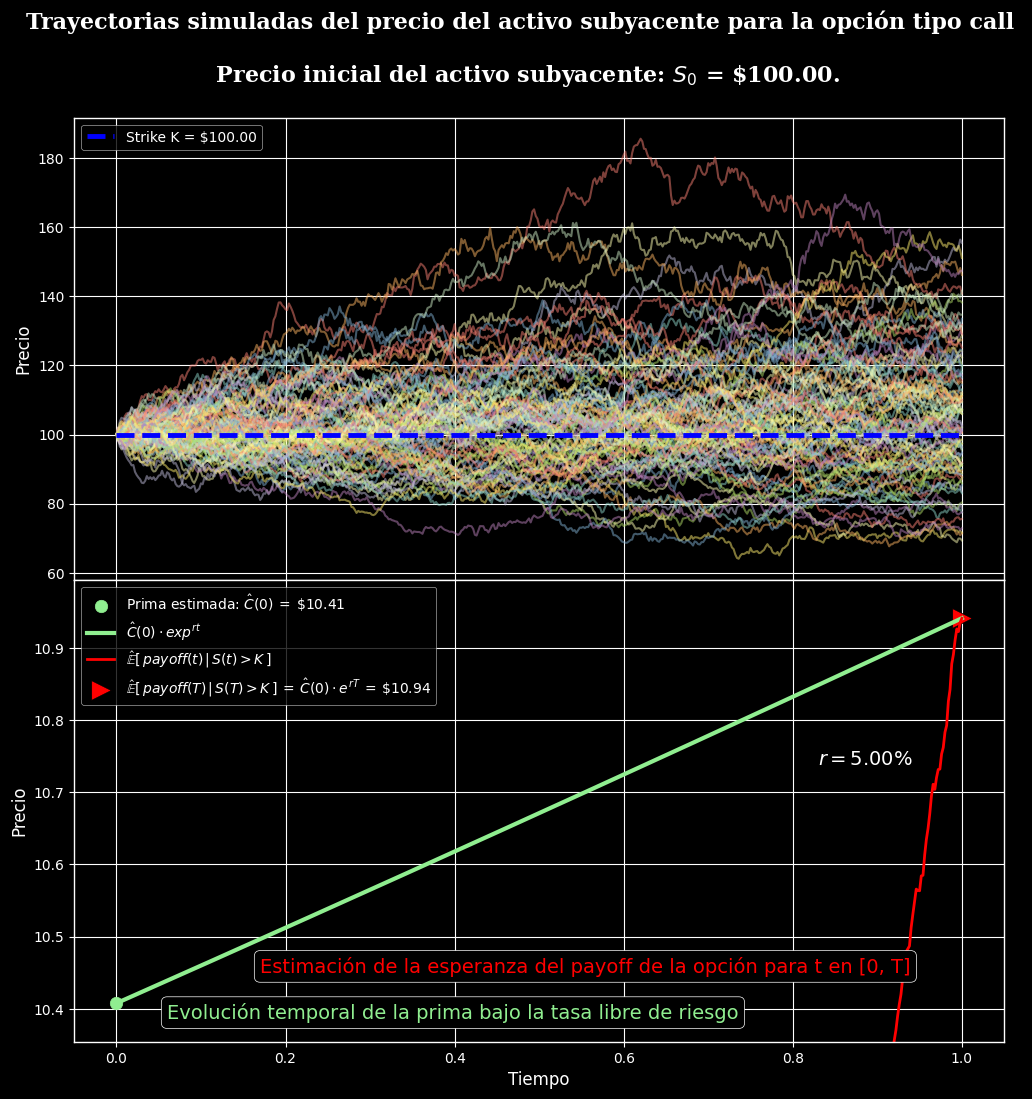

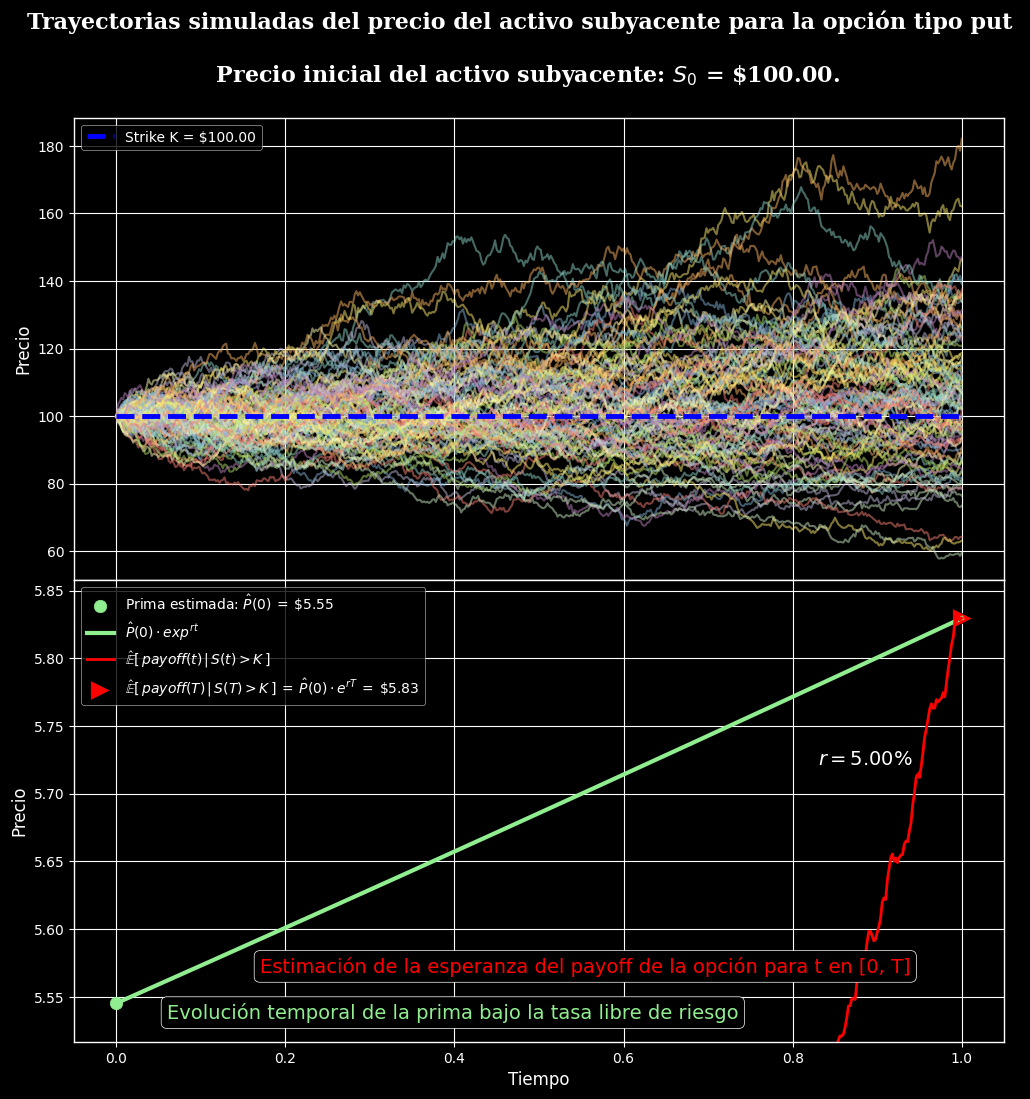

In [8]:

S0 = 100
K = 100
T = 1
sigma = 0.2
r = 0.05
steps = 500
n_sim = 10000


# ---------------------
# Método de Monte Carlo
# ---------------------

# Se define un diccionario con la función y los parámetros para calcular el
# precio del activo subyacente mediante la solución de la ecuación diferencial
# estocástica (SDE) para el movimiento browniano geométrico.
underlying_asset_dict = {
    'func': subyacente_sde,
    'params': {
        'sigma': sigma
        }
    }

# Se define un diccionario con la función y los parámetros para calcular el
# payoff de una opción europea.
payoff_dict = {
    'func': eur_option_payoffs,
    'params': {
        'K': K,
        }
    }

# Opción call mediante el método de Monte Carlo.
call_mc = monte_carlo_option_pricing(
    S0,
    T,
    r,
    underlying_asset_dict,
    payoff_dict,
    'call',
    steps,
    n_sim,
    plot_paths=True
)

# Opción put mediante el método de Monte Carlo.
put_mc = monte_carlo_option_pricing(
    S0,
    T,
    r,
    underlying_asset_dict,
    payoff_dict,
    'put',
    steps,
    n_sim,
    plot_paths=True
)

# ------------------------
# Fórmula de Black-Scholes
# ------------------------


# Opción call mediante la fórmula de Black-Scholes.
call_bs = eur_option_black_scholes(S0, T, r, K, sigma, 'call')

# Opcción put mediante la fórmula de Black-Scholes.
put_bs = eur_option_black_scholes(S0, T, r, K, sigma, 'put')


# --------------------------
# Se imprimen los resultados.
# --------------------------


print("OPCIÓN CALL")
print("-"*80)
print(f"Número de simulaciones: {n_sim:,}")
print(f"Prima mediante Monte Carlo: {call_mc:.3f}")
print(f"Prima mediante Black-Scholes: {call_bs:.3f}")
print("\n\n")

print("OPCIÓN PUT")
print("-"*80)
print(f"Número de simulaciones: {n_sim:,}")
print(f"Prima mediante Monte Carlo: {put_mc:.3f}")
print(f"Prima mediante Black-Scholes: {put_bs:.3f}")


## Valuación de una opción digital mediante **árboles binomiales**

### Método de árboles binomiales

El método de árboles binomiales asume que el precio del activo subyacente evoluciona en tiempo discreto, y que en cada paso de tiempo puede subir en proporción a un factor $u$ y una probabilidad $P_u$ o bajar con mediante un factor $d$ y nua probabilidad $P_d$, tal que $P_u + P_d = 1$. 

Es decir:

\begin{equation}

S_{n+1} = 

\begin{cases}

S_n \cdot u \qquad \text{con } \mathbb{P}[S_{n + 1} = S_n \cdot u] = P_u \\
S_n \cdot d \qquad \text{con } \mathbb{P}[S_{n + 1} = S_n \cdot d] = P_d \\

\end{cases}

\end{equation}

$$\text{con } P_u + P_d = 1$$

El árbol que ejemplifica la posbile evolución del precio del activo subyacente a dos pasos es el siguiente:

\begin{matrix}

n = 0 && n = 1 && n = 2 & \\
&&&&& \\
\vdots && \vdots && \vdots & \\
\vdots && \vdots && \vdots & \\
\vdots && \vdots && S_{uu} = S_u \cdot u = S_0 \cdot u^2 & \\
\vdots &&& \diagup && \\
&& S_u = S_0 \cdot u &&& \\
& \diagup && \diagdown && \\
S_0 &&&& S_{ud} = S_u \cdot d = S_d \cdot u = & S_0 \cdot du \\
& \diagdown && \diagup && \\
&& S_d = S_0 \cdot d &&& \\
&&& \diagdown && \\
&&&& S_{dd} = S_d \cdot d = S_0 \cdot d^2 & \\

\end{matrix}

De aquí se puede ver que existen 4 posibles trayectorias:

\begin{align*}

S_0 \rightarrow S_u \rightarrow S_{uu} \\
S_0 \rightarrow S_u \rightarrow S_{ud} \\
S_0 \rightarrow S_d \rightarrow S_{du} \\
S_0 \rightarrow S_d \rightarrow S_{dd} \\

\end{align*}


dos de las cuales son equivalentes pues llegan al mismo nodo y $S_{du} = S_0 \cdot du = S_{ud} = S_0 \cdot ud$:

\begin{align*}
\\
S_0 \rightarrow S_u \rightarrow S_{ud} \\
S_0 \rightarrow S_d \rightarrow S_{du} \\

\end{align*}


Para implementar este método en un lenguaje de programación se caracterizará el árbol de la evolución de precios mediante una matriz triangular superior de la siguiente forma:

\begin{pmatrix}

S_0 & S_u & S_{uu} \\
0 & S_d & S_{du} \\
0 & 0 & S_{dd}

\end{pmatrix}

Es decir, el precio del activo subyacente a tiempo 0 estará en la entrada $(0, 0)$, la entrada $(i, j)$ de la matriz corresponderá al precio del subyacente en el paso **j**, bajo una trayectoria que dio **i** pasos hacia abajo y **(j - i)** pasos hacia arriba.

Dado que el número de nodos finales en un árbol de **n** pasos es **n + 1**, la dimensión de dicha matriz será $(n + 1, n + 1)$.

Bajo la supocisión de **no arbitraje**, y bajo la medida neutral al riesgo $\mathbb{Q}$ sobre el activo subyacente,  el **payoff** a tiempo t cumple la siguiente igualdad:

\begin{equation}

P(t) = \frac{1}{(1 + r)^{\Delta t}} \cdot \mathbb{E}_{\mathbb{Q}}[P(t + \Delta t)]
\end{equation}

donde **r** es la tasa libre de riesgo, **P** es el **payoff** de la opción, y la medida $\mathbb{Q}$ es una medida martingala, es decir, que cumple sobre el activo subyacente **S(t)**:

\begin{align*}

S(t) = \frac{1}{(1 + r)^{\Delta t}} \cdot \mathbb{E}_{\mathbb{Q}}[S(t + \Delta t)] &= \frac{1}{(1 + r)^{\Delta t}} \cdot (q_u \cdot S_u + q_d \cdot S_d) \\
\\
\end{align*}

donde:

\begin{align*}
S_u &= S(t) \cdot u \\
S_d &= S(t) \cdot d \\
\Delta t &= T / n \\
\\
n=&: \text{Número de pasos} \\
T=&: \text{Tiempo para la fecha de maduración}

\end{align*}

Una forma de obtener las probabilidades $q_u$ y $q_d$ que definen a la medida $\mathbb{Q}$ es mediante:

\begin{equation*}
\mathbb{Q}(s) = 
\begin{cases}
    q_u = \frac{(1 + r) - d}{u - d} \\
    q_d = 1 - q_u
\end{cases}

\end{equation*}

y una condición suficiente para verificar que no existe arbitraje es:

\begin{equation*}
d \leq (1 + r) \leq u 
\end{equation*}

Tras verificar estas condiciones, y a partir de los **payoffs** a tiempo **T** mediante la ecuación **(1)** podemos calcular de manera retroactiva los **payoffs** en los distintos pasos de tiempo de cada una de las trayectorias, hasta llegar al **payoff** en **t = 0**, el cual será la prima de la opción.

### Opciones europeas digitales

Una opción europea digital es aquella cuyo payoff es igual a un valor pactado **$M$** si el activo subyacente toma un valor mayor (opción call) o menor (opción put) que el strike pactado **$K$**.

Matemáticamente puede expresarse como sigue:

**Opción call**

\begin{equation*}

P(S_t) = 

    \begin{cases}
        M, & \text{si } S_t \geq K \\
        0, & \text{si } S_t < K

    \end{cases}

\end{equation*}

**Opción put**

\begin{equation*}

P(S_t) = 

    \begin{cases}
        M, & \text{si } S_t \leq K \\
        0, & \text{si } S_t > K
    \end{cases}

\end{equation*}

donde:

\begin{align*}

M :&= \text{Pago pactado a vencimiento} \\
S_t :&= \text{Precio del activo subyacente en la fecha de vencimiento} \\
K :&= \text{Strike de la opción} \\
P(\cdot) :&= \text{Payoff de la opción}

\end{align*}


___

A continuación se define una función para implementar el método de **árboles binomiales** para **opciones digitales**.

<br>

La función recibe como parámetros de entrada los siguientes:

$\bf{S_0}$:

$\qquad$  Precio inicial del activo subyacente.

$\bf{K}$:

$\qquad$ Strike de la opción.

$\bf{r}$:

$\qquad$ Tasa libre de riesgo.

$\bf{T}$:

$\qquad$ Tiempo para el vencimiento de la opción.

$\bf{M}$: 

$\qquad$ Monto de pago pactado en caso de ejercer la opción.

$\bf{u}$:

$\qquad$ Factor de crecimiento del precio del subyacente en caso de que suba.

$\bf{d}$:

$\qquad$ Factor de decrecimiento del precio del subyacente en caso de que baje.

$\bf{n\_steps}$:

$\qquad$ Número de pasos usados en la discretización del tiempo.

$\bf{option\_type}$:

$\qquad$ Tipo de opción (**call** o **put**).

$\bf{plot\_sub\_tree}$:

$\qquad$ Indicador booleano para graficar o no el árbol de precios del subyacente.

$\bf{plot\_payoff\_tree}$:

$\qquad$ Indicador booleano para graficar o no el árbol de payoffs de la opción.

<br>

Y bajo dichos parámetros devuelve la valuación de la opción dada mediante el método de **árboles binomiales**.

In [9]:
def arbol_binomial_opcion_digital(
    S0: float,
    K: float,
    r: float,
    T: float,
    M: float,
    u: float,
    d: float,
    n_steps: int,
    option_type: str,
    plot_sub_tree: bool,
    plot_payoff_tree: bool
) -> float:
    """Calcula la prima de una opción europea digital mediante el método de 
    árbol binomial.
    
    Parameters
    ----------
    S0 : float
        Precio inicial del activo subyacente.
    K : float
        Strike de la opción.
    r : float
        Tasa libre de riesgo.
    T : float
        Tiempo al vencimiento de la opción, en años.
    M : float
        Monto de pago pactado en caso de ejercer la opción.
    u : float
        Factor de crecimiento del precio del subyacente en caso de que suba.
    d : float
        Factor de decrecimiento del precio del subyacente en caso de que baje.
    n_steps : int
        Número de pasos en la discretización del tiempo.
    option_type : str
        Tipo de opción ('call' o 'put').
    plot_sub_tree : bool
        Indicador para graficar o no el árbol de precios del subyacente.
    plot_payoff_tree : bool
        Indicador para graficar o no el árbol de payoffs de la opción.
        
    Returns
    -------
    option_prime : float
        Prima de la opción.
        
    """
   
    # ------------------------------------------------
    # Construcción del árbol de precios del subyacente.
    # ------------------------------------------------
    
    # Se define un arreglo con el cual se va a caracterizar el árbol de precios
    # del activo subyacente como una matriz triangular superior. 
    arbol_sub = np.zeros((n_steps + 1, n_steps + 1))
    
    # Esto se hará de la siguiente manera:
    
    # El precio del subyacente en el tiempo 0, S0, se coloca en la entrada
    # (0, 0) de la matriz.
    arbol_sub[0, 0] = S0
    
    # La entrada (i, j) de la matriz corresponderá al precio del subyacente
    # al tiempo j, bajo una trayectoria que dio i pasos hacia abajo y (j - i)
    # pasos hacia arriba.
    
    # Por ejemplo, la entrada (3, 4) corresponde al precio del subyacente al
    # tiempo 4, bajo una trayectoria que dio 3 pasos hacia abajo y 1 paso hacia
    # arriba.
    
    # Ciclo for sobre las columnas de la matriz, que representan los pasos 
    # discretos en el tiempo.
    for j in range(1, n_steps + 1):
        
        # Ciclo for sobre las filas de la matriz, que representan el número de
        # pasos hacia abajo.
        for i in range(n_steps + 1):
            
            # Condición que garantiza que la matriz sea triangular superior.
            if(j >= i):
                
                # Se calcula el precio del subyacente al tiempo j, bajo una
                # trayectoria que dio i pasos hacia abajo y (j - i) pasos hacia
                # arriba.
                arbol_sub[i, j] = S0 *(( u ** (j - i)) * (d ** i))
                
            # Para las entradas debajo de la diagonal se mantiene el valor 0.    
            else:
                 pass
    
    # ------------------------------------------------
    # Construcción del árbol de payoffs de la opción.
    # ------------------------------------------------
    
    # Dado que para las opciones europeas digitales el payoff únicamente depende
    # del precio del subyacente al tiempo T, y no de la trayectoria que siguió
    # se pueden considerar equivalentes todas las trayectorias que terminen en
    # el mismo nodo del árbol. Además, el número de nodos finales después de
    # n pasos es n + 1, por lo que el número de posbiles trayectorias, no 
    # equivalentes entre sí, es n + 1.
    n_paths = n_steps + 1
    
    # De manera análoga al árbol de precios del subyacente, se define un arreglo
    # con el cual se va a caracterizar el árbol de payoffs como una matriz
    # triangular superior. De nuevo, la entrada (i, j) de la matriz corresponde
    # al payoff de la opción al tiempo j, bajo una trayectoria que dio i pasos
    # hacia abajo y (j - i) pasos hacia arriba.
    payoffs = np.zeros((n_paths, n_steps + 1))
        
    # Se calcula el valor del payoff en el tiempo de maduración T, o después de
    # n pasos, para cada una de las trayectorias.
    for n_path in range(n_paths):
       
        # Valor final del subyacente bajo la trayectoria n-ésima.
        ST = arbol_sub[n_path, -1]
        
        # Se define una variable indicadora que toma el valor 1 si el subyacente
        # toma un valor que hace que la opción se ejerza, y 0 en caso contrario.
        if(option_type == "call"):
            indicator = int(ST >= K)
        elif(option_type == "put"):
            indicator = int(ST <= K)
        
        # Se calcula el payoff de la opción al tiempo T, después de n pasos,	
        # para la trayectoria n-ésima. El payoff es M si la opción se ejerce, y
        # 0 en caso contrario.
        payoffs[n_path, -1] = M * indicator

    # A continuación se calculan los payoffs en los tiempos anteriores, de
    # manera retroactiva, a partir de los payoffs en el tiempo T.
    
    # Primero se calculan las probabilidades de subida y bajada bajo la medida
    # neutral al riesgo.
    
    # Probabilidad de subida. 
    p_u = ((1 + r) - d) / (u - d)
    # Probabilidad de bajada.
    p_d = 1 - p_u

    # Se calcula el factor de descuento que se aplicará al valor
    # esperado del payoff en cada paso para obtener el valor del
    # payoff en el paso anterior.
    discount_factor = (1 / (1 + r)) ** (T / n_steps)

    # Se calcula el valor de los payoffs en el paso (n_steps - backward_step)
    for backward_step in range(1, n_steps + 1):        
        
        for n_path in range(n_paths - backward_step):
            
            # Para cada nodo en el paso (n_steps - backward_step) se localizan
            # el nodo que subió y el que bajó a partir de él, ubicados en el
            # paso siguiente, es decir, en (n_steps - backward_step + 1).
            up_step = payoffs[n_path, -backward_step]
            down_step = payoffs[n_path + 1, -backward_step]
            
            # Se calcula el valor esperado del payoff en el paso
            # (n_steps - backward_step + 1).
            expec_val = (p_u * up_step + p_d * down_step)
            
            # Se calcula el payoff en el paso (n_steps - backward_step)
            # como el valor esperado del payoff en el paso siguiente,
            # (n_steps - backward_step + 1), descontado a valor presente en 
            # (t / n_steps) unidades de tiempo.
            payoffs[n_path, (-backward_step - 1)] =  discount_factor * expec_val
    
    # El valor de la prima de la opción es el valor del payoff en el nodo
    # inicial, es decir, en el tiempo 0.
    option_prime = round(payoffs[0, 0], 2)
    
    # Se grafican los árboles de precios del subyacente y de payoffs de la
    # opción.
    if plot_sub_tree:
        title_kwargs = {
            "u": u,
            "d": d,
        }
        plot_prices_tree(arbol_sub, "subyacente", params_dict=title_kwargs)
    if plot_payoff_tree:
        title_kwargs = {
            "u": u,
            "P_u": p_u,
            "d": d,
            "P_d": p_d,
            "S_0": S0
        }
        plot_prices_tree(payoffs, "opción", option_type, params_dict=title_kwargs)
    
    return option_prime



### Valuación de opciones digitales con árbol binomial

Se considera una opción digital (*Call* o *Put*) con las siguientes características:

- Pago a vencimiento $M = 200$
- Precio inicial del activo subyaciente: $S_0 = 4$
- Factor $u = 2$
- Factor $d = 0.5$
- Strike $K = 2$
- Tasa libre de riesgo $r = 0.25$

Con una discretización del tiempo de **5 pasos**.

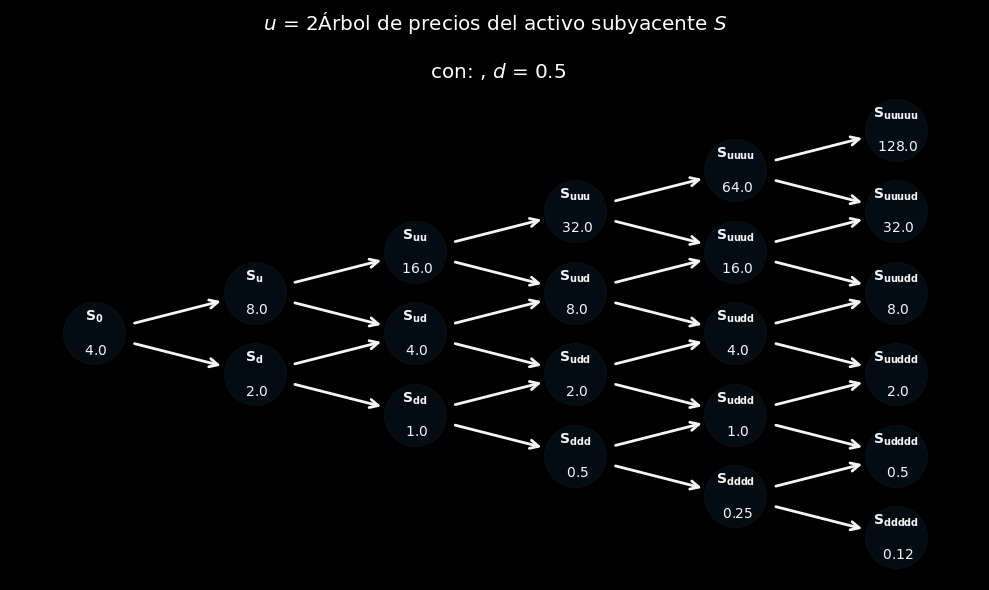

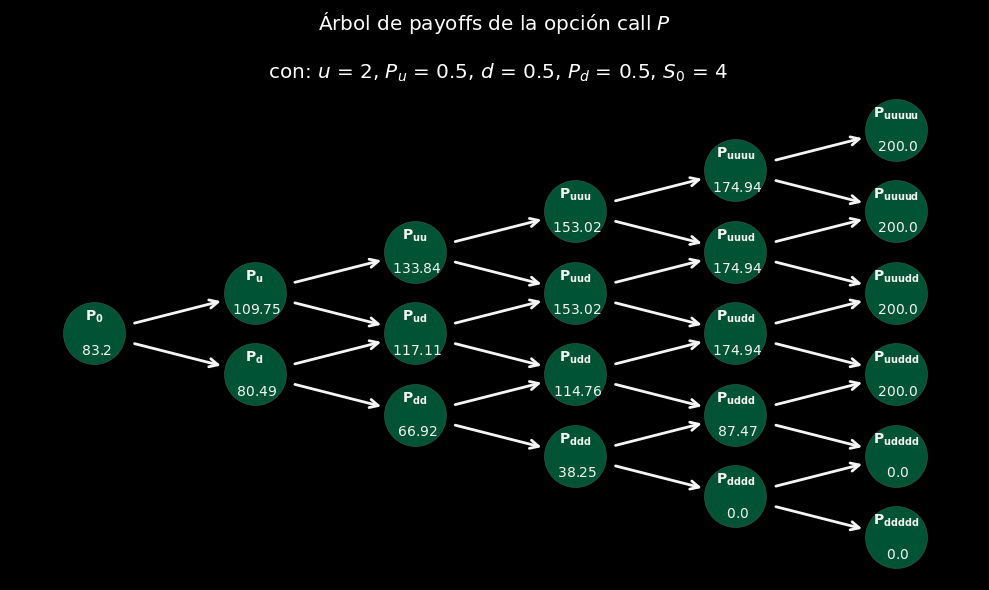

--------------------------------------------------------------------------------
OPCIÓN CALL
--------------------------------------------------------------------------------
Prima de la opción: 83.2
--------------------------------------------------------------------------------


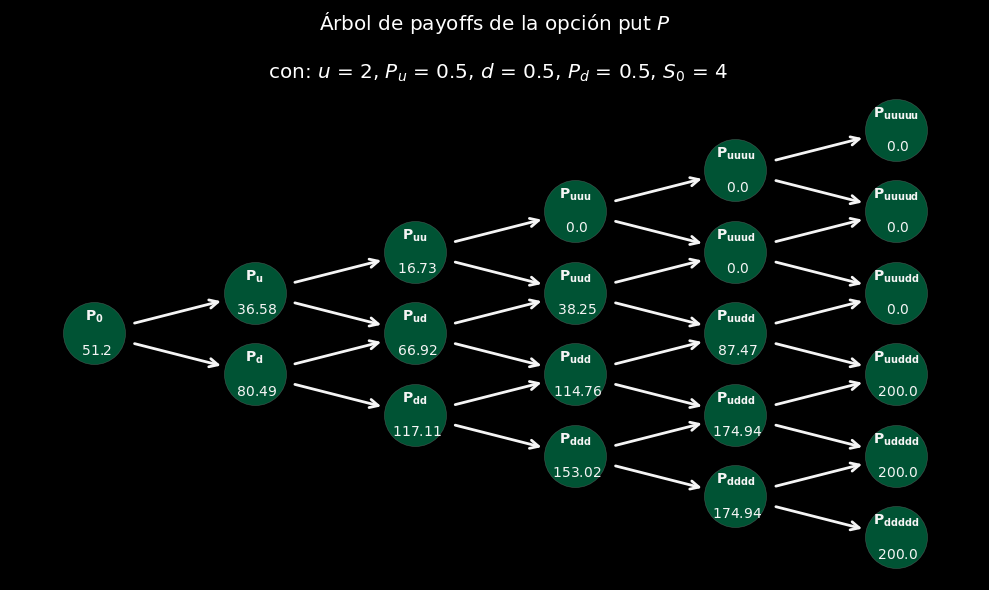

--------------------------------------------------------------------------------
OPCIÓN PUT
--------------------------------------------------------------------------------
Prima de la opción: 51.2
--------------------------------------------------------------------------------


In [10]:
S0 = 4
K = 2
r = 0.25
t = 3
M = 200
u = 2
d = 0.5
n_steps = 5

# Option call
call_bin = arbol_binomial_opcion_digital(
    S0,
    K,
    r,
    t,
    M,
    u,
    d,
    n_steps,
    "call",
    plot_sub_tree=True,
    plot_payoff_tree=True
)
print("-"*80)
print("OPCIÓN CALL")
print("-"*80)
print(f"Prima de la opción: {call_bin}")
print("-"*80)

# Option put
put_bin = arbol_binomial_opcion_digital(
    S0,
    K,
    r,
    t,
    M,
    u,
    d,
    n_steps,
    "put",
    plot_sub_tree=False,
    plot_payoff_tree=True
)
print("-"*80)
print("OPCIÓN PUT")
print("-"*80)
print(f"Prima de la opción: {put_bin}")
print("-"*80)

## Valuación de opciones tipo lookback mediante discretización de **Euler-Mayurama** y  método **Monte Carlo**

### Discretización de Euler-Mayurama

Dada una ecuación diferencial estocástica con la siguiente estructura:

\begin{equation*}
\begin{split}

dX(t) &= a(t, X) dt + b(t, X) dW_t \\
X(c) &= X_c \\
\\
\text{con } W_t &\sim Normal\left(0, \sqrt{t}\right)

\end{split}
\end{equation*}

El método de discretización *Euler-Mayurama* aproxima su solución en una colección finita de puntos dentro de un intervalo $[a, b]$:

\begin{equation*}
a = t_0 < t_1 < \dots < t_n = b
\end{equation*}

mediante el siguiente esquema:

\begin{split}
w_0 &= X_0 \\
w_{i + 1} &= w_i + a(t_i, w_i) \Delta t_{i + 1} + b(t_i, w_i) \Delta W_{i + 1}
\end{split}

donde

\begin{split}
\Delta t_{i + 1} &= t_{i + 1} - t_i \\
\Delta W_{i + 1} &= W_{t + 1} - W{t_i}
\end{split}

Dado que $W_i$ es un movimiento browniano, tendremos que:

\begin{split}
\Delta W_i &= z_i \sqrt{\Delta t_i} \\
z_i & \sim Normal(0, 1)
\end{split}

Se dice que un método de discretización de una ecuación diferencial estocástica converge fuertemente con un orden **m** si el valor esperado del error es de orden **m** respecto al tamaño de paso. Es decir, para cualquier tiempo $T\in [a, b]$:

\begin{equation*}
\mathbb{E}[\: |X(T) - w_{\Delta t}(T)| \:] = \mathit{O}((\Delta t)^m)
\end{equation*}

En particular, el método de **Euler-Murayama** es de orden **1/2**.

Para el caso de la ecuación de Black-Scholes tenemos:

\begin{split}
a(t_i, w_i) &= \mu w_i \\
b(t_i, w_i) &= \sigma w_i \\
\end{split}

Por lo que el esquema para aproximar el precio del activo subyacente adquiere la siguiente forma:

\begin{split}
w_{i + 1} &= w_i + \mu w_i \Delta t_i + \sigma w_i \Delta W_i \\
w_0 &= X_0
\end{split}


___

Se define una función que, dados $n$ precios del activo subyacente al tiempo $t$, aproxima $n$ precios del mismo activo al tiempo $t + \Delta t$, mediante la discretización de **Euler-murayama** para la ecuación diferencial estocástica de un movimiento browniano geométrico con **drift** y **volatilidad** constantes.

In [11]:
def subyacente_euler_murayama(
    St: np.array, r: float, dt: float, sigma: float
    ) -> np.array:
    """Dado un objeto numpy.array de dimensiones (n, 1), con n precios del
    activo subyacente al tiempo t, aproxima el precio del activo subyacente al
    tiempo t + dt mediante la discretización de Euler-Murayama para la ecuación
    diferencial estocástica de un movimiento browniano geométrico con drift y
    volatilidad constantes, para cada uno de los n precios dados al tiempo t.
    
    Parameters
    ----------
    St : np.array
        Objeto numpy.array de dimensiones (n, 1) que contiene el
        precio del activo subyacente al tiempo t para cada una de las
        trayectorias para las que se quiere calcular el precio al tiempo t + dt.
    r : float
        Tasa libre de riesgo.
    dt : float
        Incremento de tiempo para cual se quiere calcular el precio del activo
        subyacente al tiempo t + dt.
    sigma : float
        Volatilidad de los retornos diarios del activo subyacente.

    Returns
    -------
    S_next : numpy.array
        Arreglo de dimensiones (n, 1) con el precio del activo subyacente al
        tiempo t + dt para cada uno de los n precios dados al tiempo t.
    """        
    
    # Cantidad de precios a calcular.
    n = St.shape[0]
    
    # Se generan "n_paths" números aleatorios provenientes de una distribución
    # normal estándar.    
    z = np.random.normal(0, 1, size=n)
    
    # Se calcula el incremento del movimiento browniano a utilizar en la
    # discretización de Euler-Maruyama.
    dw = np.sqrt(dt) * z
    
    # Esquema de Euler-Maruyama para el modelo de Black-Scholes.
    S_next = St * (1 + (r - 0.5 * sigma ** 2) * dt + sigma * dw)
    
    return S_next

### Opciones tipo lookback

Las opciones **lookback** permiten al inversor beneficiarse del mejor precio, ya sea para compra o venta, alcanzado por el activo subyacente durante la vida del contrato, pues tienen un **payoff** que depende del máximo o mínimo del subyacente desde la emisión hasta el vencimiento de dicho instrumento derivado. Dentro de las distintas variedades dos de los más comunes son con **strike flotante** y los de **strike fijo**. 

En el caso del **strike fijo** este se pacta y fija desde la emisión de la opción, y en el caso del **strike flotante** este será igual al precio del activo subyacente en la fecha de maduración. 

Los distintos **payoffs** se definen de la siguiente forma:

\begin{split}

P_{call}(T) = 

\begin{cases}
\max (0, \: M(T) - K) \qquad &\text{strike fijo} \\
M(T) - S(T) &\text{strike flotante}
\end{cases} \\

\\

P_{put}(T) = 

\begin{cases}
\max (0, \: K - m(T)) \qquad &\text{strike fijo} \\
S(T) - m(T) &\text{strike flotante}
\end{cases}

\end{split}

donde:

\begin{split}
& m(T) := \min_{t\in [0, T]}{S(t)} \\
& M(T) := \max_{t\in [0, T]}{S(t)} \\

\\

& T := \text{Tiempo para la fecha de maduración} \\
& K := \text{Strike fijo de la opción} \\
& S(t) := \text{Precio del activo subyacente al tiempo t} \\
& P(\cdot) := \text{Payoff de la opción}
\end{split}

___

Se define una función que a partir de un conjunto de trayectorias del **subyacente** calcula el payoff de una opción **lookback**, ya sea **call** o **put**, con strike **fijo** o **flotante** para cada una de las trayectorias dadas.

In [12]:
def lookback_payoffs(
    S: np.array, option_type: str, K: float, strike_type
    ) -> np.array:
    """Dado un conjunto de trayectorias del precio del activo subyacente,
    organizados en un arreglo de dimensiones (n_paths, n_steps), donde n_paths
    es el número de trayectorias y n_steps es el número de pasos de tiempo,
    calcula el valor payoff de una opción lookback para cada una de las
    trayectorias.
    
    Parameters
    ----------
    S : numpy.array
        Arreglo con las trayectorias del precio del activo subyacente.
        Las dimensiones de S deben ser (n_paths, n_steps), donde n_paths
        es el número de trayectorias y n_steps es el número de pasos de tiempo.
    option_type : str
        Tipo de opción, puede ser 'call' o 'put'.
    K : float
        Strike fijo de la opción.
    strike_type : str
        Tipo de strike, puede ser 'fixed' o 'floating'.
        
    Returns
    -------
    payoffs : numpy.array
        Arreglo con los payoffs de la opción para cada una de las trayectorias
        dados en el arreglo S.
    """
    
    # Se extrae el precio del subyacente al tiempo T para cada simulación.    
    S_T = S[:, -1]
    
    # Se calcula el payoff de la opción al tiempo T para cada simulación.
    if option_type == 'call':
        
        M = S.max(axis=1)
        
        if strike_type == 'fixed':
            payoffs = np.maximum(M - K, 0)
        
        elif strike_type == 'floating':
            payoffs = M - S_T
            
        else:
            raise ValueError("El tipo de strike debe ser 'fixed' o 'floating'.")
            
    elif option_type == 'put':
        
        m = S.min(axis=1)
        
        if strike_type == 'fixed':
            payoffs = np.maximum(K - m, 0)
            
        elif strike_type == 'floating':
            payoffs = S_T - m
    
        else:
            raise ValueError("El tipo de strike debe ser 'fixed' o 'floating'.")

    else:
        raise ValueError("El tipo de opción debe ser 'call' o 'put'.")
    
    return payoffs

### Cálculo de la prima de opciones **lookback** 

Se calcula la prima de una opción call y otra put del tipo lookback con strike flotante y con strike fijo con los siguientes parámetros:

- S0 = 100 (Precio actual del activo riesgoso)
- K = 100 (Strike)
- T = 1 año (Plazo de vencimiento)
- σ = 20 % (Volatilidad Anual)
- r = 5 % (tasa libre de riesgo anual)

Además, se usarán *100* pasos para discretizar el tiempo, y **10,000** simulaciones para el método de **Monte Carlo**.

In [13]:
S0 = 100
T = 1 
sigma = 0.2
r = 0.05  
k  = 100
steps = 100
n_sim = 10000

# Se define un diccionario con la función y los parámetros para calcular el
# precio del activo subyacente mediante la discretización de Euler-Maruyama.

underlying_asset_dict = {
    'func': subyacente_euler_murayama,
    'params': {
        'sigma': sigma
        }
    }

**Valuación con strike fijo**

OPCIÓN LOOKBACK CON STRIKE FIJO
--------------------------------------------------------------------------------
Prima de la opción lookback call: 16.828
Prima de la opción lookback put: 11.954


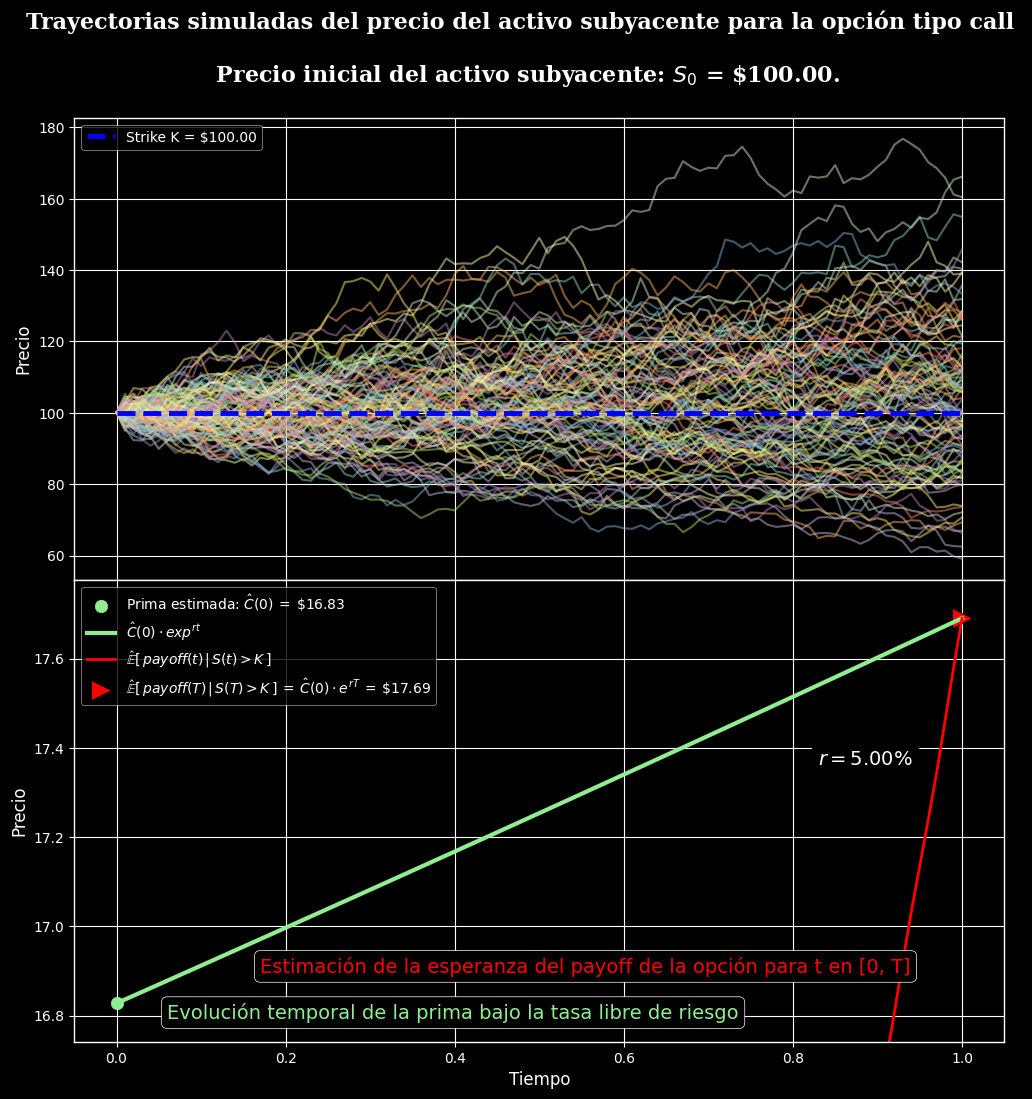

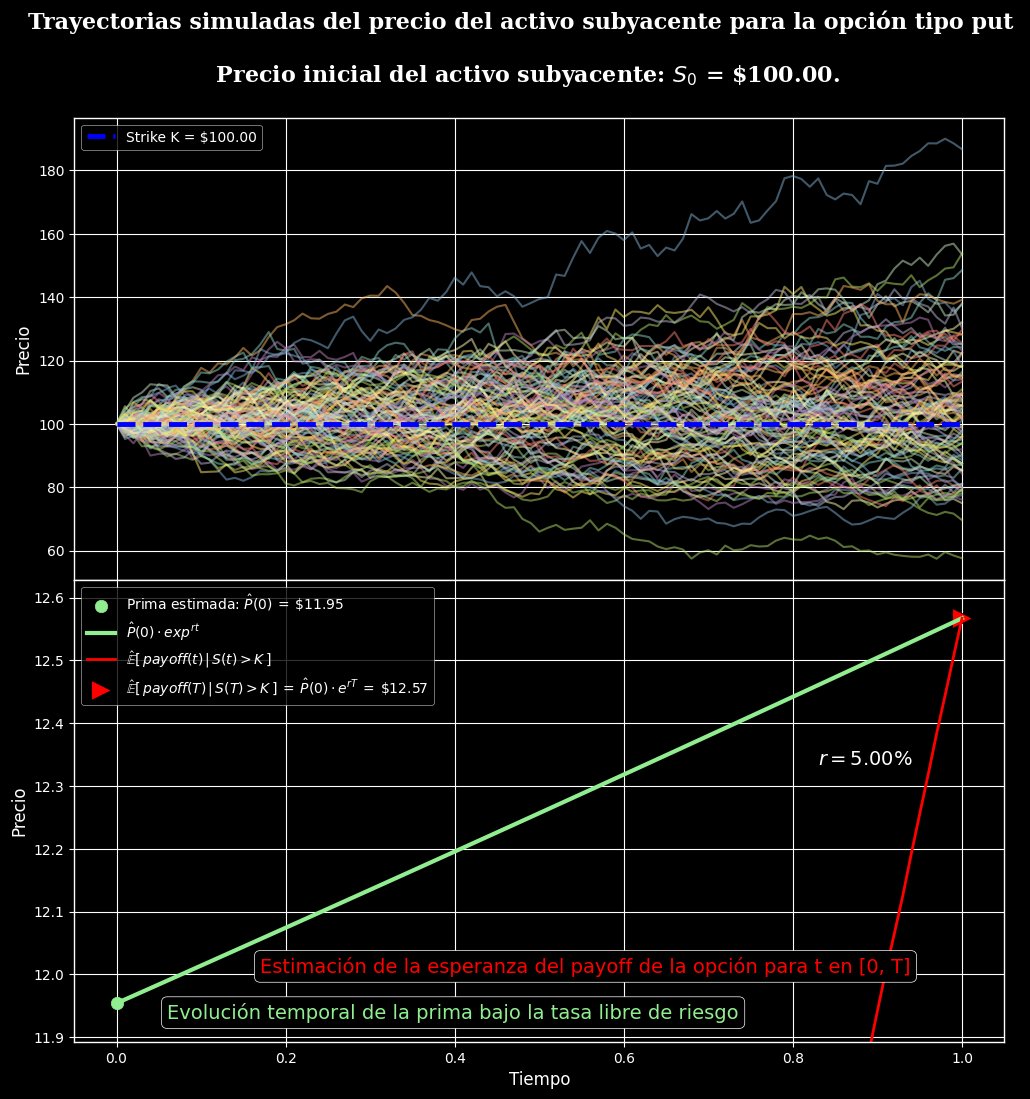

In [14]:
# Se define un diccionario con la función y los parámetros para calcular el
# payoff de una opción lookback con strike fijo.
payoff_dict = {
    'func': lookback_payoffs,
    'params': {
        'K': k,
        'strike_type': 'fixed'
        }
    }

# Opción lookback call con strike fijo
lookback_fixed_call_mc = monte_carlo_option_pricing(
    S0,
    T,
    r,
    underlying_asset_dict,
    payoff_dict,
    'call',
    steps,
    n_sim,
    plot_paths=True
)

# Opción lookback put con strike fijo
lookback_fixed_put_mc = monte_carlo_option_pricing(
    S0,
    T,
    r,
    underlying_asset_dict,
    payoff_dict,
    'put',
    steps,
    n_sim,
    plot_paths=True
)

print("OPCIÓN LOOKBACK CON STRIKE FIJO")
print("-"*80)
print(f"Prima de la opción lookback call: {lookback_fixed_call_mc:.3f}")
print(f"Prima de la opción lookback put: {lookback_fixed_put_mc:.3f}")

**Valuación con strike flotante**

OPCIÓN LOOKBACK CON STRIKE FLOTANTE
--------------------------------------------------------------------------------
Prima de la opción lookback call: 16.828
Prima de la opción lookback put: 11.954


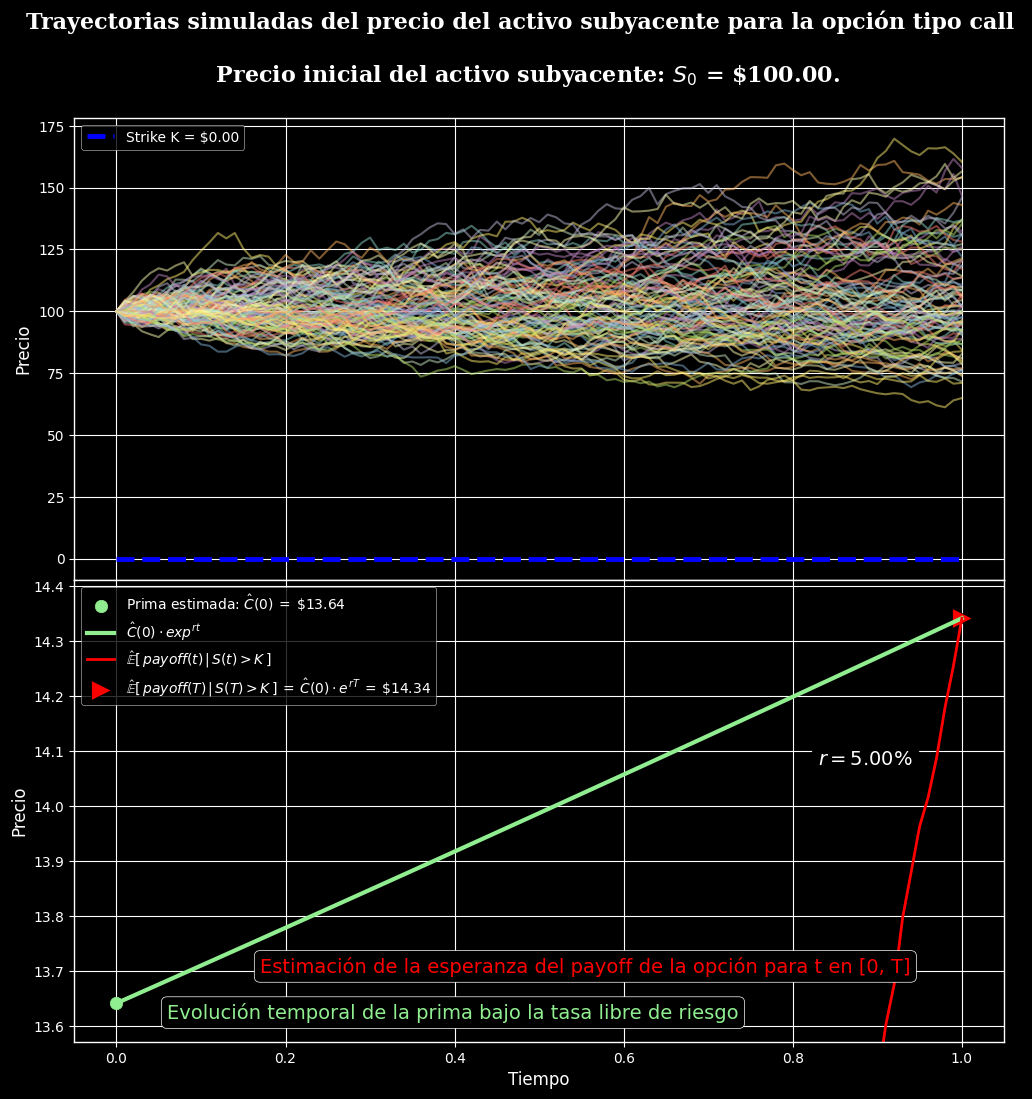

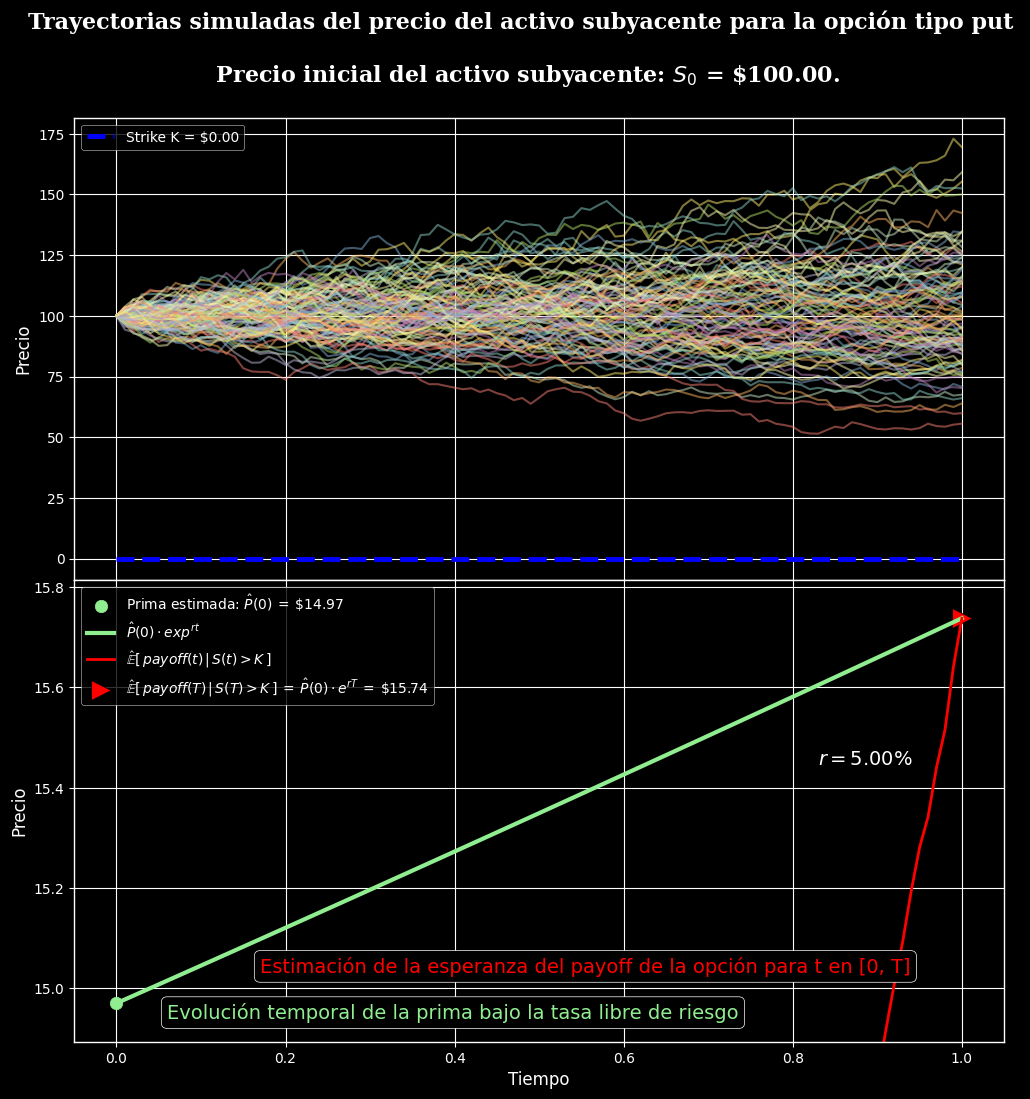

In [15]:
# Se define un diccionario con la función y los parámetros para calcular el
# payoff de una opción lookback con strike flotante.
payoff_dict = {
    'func': lookback_payoffs,
    'params': {
        'K': 0,
        'strike_type': 'floating'
        }
    }

# Opción lookback call con strike fijo
lookback_floating_call_mc = monte_carlo_option_pricing(
    S0,
    T,
    r,
    underlying_asset_dict,
    payoff_dict,
    'call',
    steps,
    n_sim,
    plot_paths=True
)

# Opción lookback put con strike fijo
lookback_floating_put_mc = monte_carlo_option_pricing(
    S0,
    T,
    r,
    underlying_asset_dict,
    payoff_dict,
    'put',
    steps,
    n_sim,
    plot_paths=True
)

print("OPCIÓN LOOKBACK CON STRIKE FLOTANTE")
print("-"*80)
print(f"Prima de la opción lookback call: {lookback_fixed_call_mc:.3f}")
print(f"Prima de la opción lookback put: {lookback_fixed_put_mc:.3f}")